In [130]:
import sys; sys.path.append("../.."); sys.path.append("../../src/")
import plantbox as pb
import pickle

import matplotlib.pyplot as plt
import numpy as np
import os
from structural.Plant import PlantPython
import pandas as pd
import copy

subtypes = 5
years = 10

In [140]:

###
# Create the graphs
# to do: test the survival graphs + update code. as long as attached to existng long lived is ok
# as long as a living root is attched, will keep on living.
##
outpout_mean = {}
outpout_sd = {}
for genotype in ["B", "D", "E"]:

    with open('./measurements'+ genotype +'Init.pkl','rb') as f:
        temp = pickle.load(f)
        outpout_mean[genotype] = temp['mean']
        outpout_sd[genotype] = temp['sd']
x = [year for year in range(years)]        


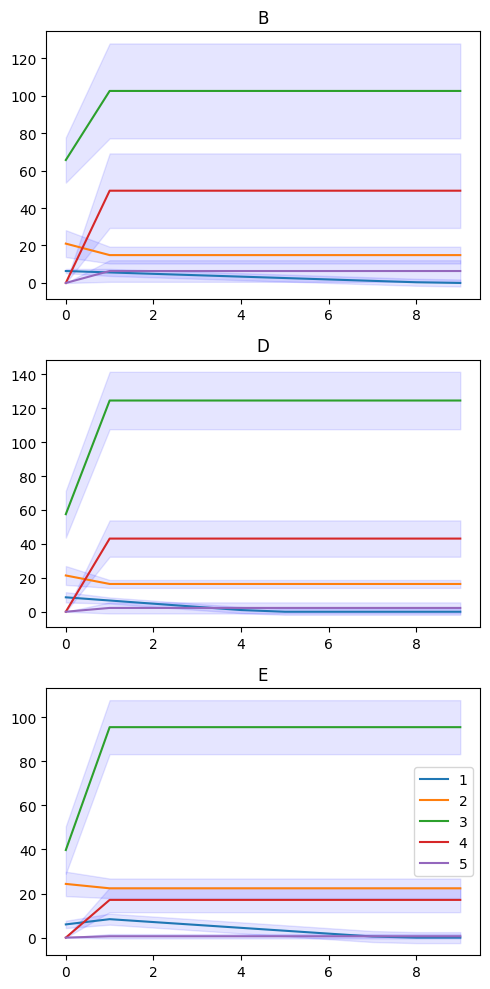

In [132]:
#####
#   num
#####
# create dict for each genotype, 2D arrays: [[length for each year] each subtype]
outpout_num_mean = {}
outpout_num_sd = {}

for genotype in ["B", "D", "E"]:
    outpout_num_mean[genotype] = np.array([
            np.array([outpout_mean[genotype]['year'+str(year + 1)]['num'][st] for year in range(years)])
            for st in range(subtypes)])
    outpout_num_sd[genotype] = np.array([
            np.array([outpout_sd[genotype]['year'+str(year + 1)]['num'][st] for year in range(years)])
            for st in range(subtypes)])
    

fig, axs = plt.subplots(3,1, figsize=(5, 10))  # 2 rows, 2 columns
for gid, genotype in enumerate(["B", "D", "E"]):
    for st in range(subtypes):
        y = outpout_num_mean[genotype][st]
        error = outpout_num_sd[genotype][st]
        axs[gid].plot(x, y, label = st + 1)
        axs[gid].fill_between(x, y - error, y + error, color='blue', alpha=0.1)
    axs[gid].set_title(genotype)

plt.legend()
# Adjust spacing between subplots
plt.tight_layout()

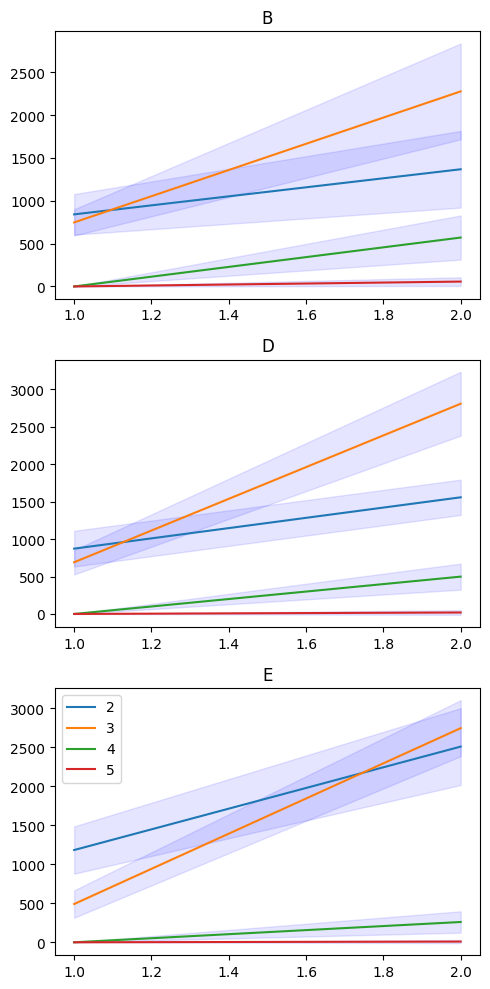

In [135]:
#####
#   length
#####
# create dict for each genotype, 2D arrays: [[length for each year] each subtype]
outpout_len_mean = {}
outpout_len_sd = {}
x_ =[1,2]
for genotype in ["B", "D", "E"]:
    outpout_len_mean[genotype] = np.array([
            np.array([outpout_mean[genotype]['year'+str(year + 1)]['length'][st] for year in range(2)])
            for st in range(subtypes - 1)])
    outpout_len_sd[genotype] = np.array([
            np.array([outpout_sd[genotype]['year'+str(year + 1)]['length'][st] for year in range(2)])
            for st in range(subtypes - 1)])
    
fig, axs = plt.subplots(3,1, figsize=(5, 10))  # 2 rows, 2 columns
for gid, genotype in enumerate(["B", "D", "E"]):
    for st in range(subtypes - 1):
        y = outpout_len_mean[genotype][st]
        error = outpout_len_sd[genotype][st]
        axs[gid].plot(x_, y, label = st + 2)
        axs[gid].fill_between(x_, y - error, y + error, color='blue', alpha=0.1)
    axs[gid].set_title(genotype)

plt.legend()
# Adjust spacing between subplots
plt.tight_layout()

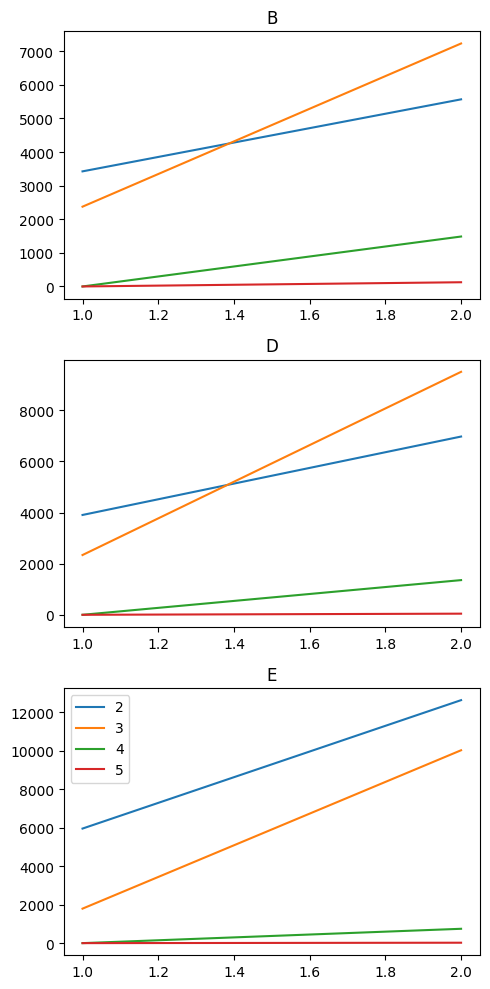

In [137]:
#####
#   length, mean, just checking that it does not decrease
# ah wait, not ok: num should be stable but maybe not length, so ignore length after year two, just look at num?
#####
# create dict for each genotype, 2D arrays: [[length for each year] each subtype]

fig, axs = plt.subplots(3,1, figsize=(5, 10))  # 2 rows, 2 columns
for gid, genotype in enumerate(["B", "D", "E"]):
    for st in range(subtypes - 1):
        y = outpout_len_mean[genotype][st]/outpout_num_mean[genotype][st+1]
        # error = outpout_num_sd[genotype][st]
        axs[gid].plot(x_, y, label = st + 2)
        # axs[gid].fill_between(x, y - error, y + error, color='blue', alpha=0.1)
    axs[gid].set_title(genotype)

plt.legend()
# Adjust spacing between subplots
plt.tight_layout()

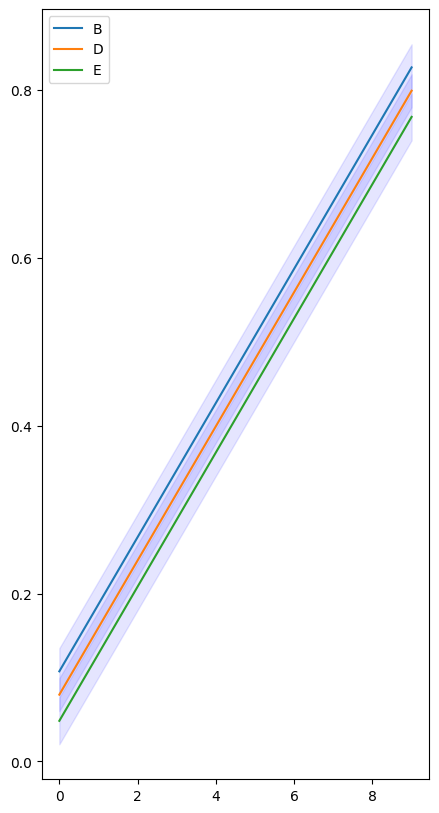

In [151]:
#####
#   ratio
#####

###
# Create the graphs
# to do: test the survival graphs + update code. as long as attached to existng long lived is ok
# as long as a living root is attched, will keep on living.
##
outpout_mean = {}
outpout_sd = {}
for genotype in ["B", "D", "E"]:

    with open('./measurements'+ genotype +'Init.pkl','rb') as f:
        temp = pickle.load(f)
        outpout_mean[genotype] = temp['mean']
        outpout_sd[genotype] = temp['sd']
x = [year for year in range(years)]        

# create dict for each genotype, 2D arrays: [[length for each year] each subtype]
outpout_ratio_mean = {}
outpout_ratio_sd = {}

for genotype in ["B", "D", "E"]:
    outpout_ratio_mean[genotype] = np.array([outpout_mean[genotype]['year'+str(year + 1)]['ratio'] for year in range(years)])
    outpout_ratio_sd[genotype] = np.array([outpout_sd[genotype]['year'+str(year + 1)]['ratio'] for year in range(years)])
    
fig, axs = plt.subplots(1,1, figsize=(5, 10))  # 2 rows, 2 columns
for gid, genotype in enumerate(["B", "D", "E"]):
    y = outpout_ratio_mean[genotype]
    error = outpout_ratio_sd[genotype] 
    axs.plot(x, y, label = genotype)
    axs.fill_between(x, y - error, y + error, color='blue', alpha=0.1)


plt.legend()
# Adjust spacing between subplots
plt.show()

In [148]:
print(np.mean([oo[0] for oo in outpout_num_mean.values()]))

0.07834288337443733
